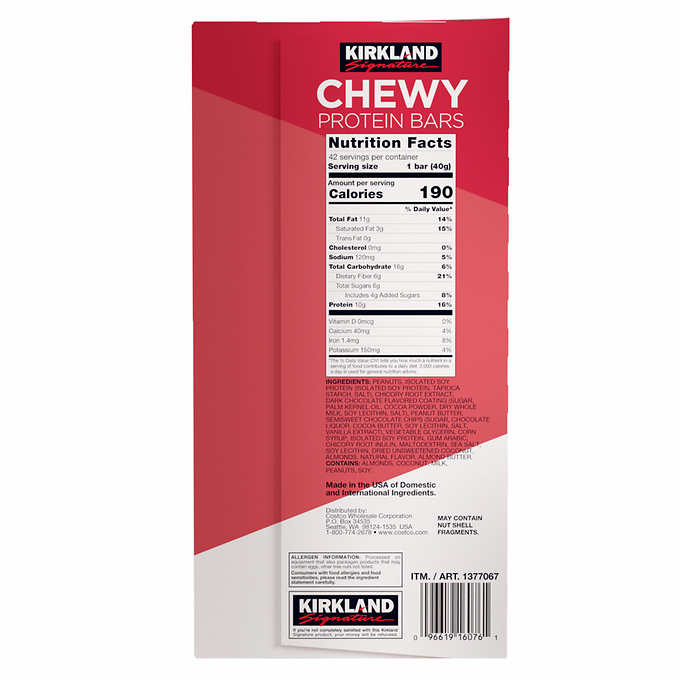

TypeError: can only concatenate str (not "float") to str

In [9]:
import sqlite3
from PIL import Image

conn = sqlite3.connect('data/food_info.db')

cursor = conn.cursor()

sql_query = "SELECT name, price FROM products;"

cursor.execute(sql_query)

image_names = cursor.fetchall()

for name in image_names:
    path = 'data/'+name[0]+'.jpg'
    im = Image.open(path)
    im.show()
    print('$'+name[1])

cursor.close()
conn.close()